In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense , Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamrese

### Preparing the Data

In [2]:
import pathlib
import tensorflow as tf

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)


In [3]:
print(data_dir)

C:\Users\hp\.keras\datasets\flower_photos


C:\Users\hp\.keras\datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg


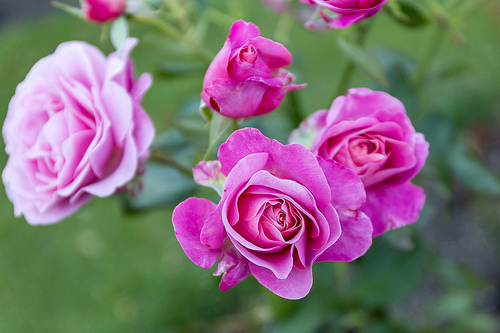

In [4]:
# Convert data_dir to a pathlib.Path object using forward slashes
data_dir_path = pathlib.Path("C:/Users/hp/.keras/datasets/flower_photos")

roses = list(data_dir_path.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[9]))

In [5]:
img_height, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### Trainin The model

In [8]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                 input_shape=(180,180,3),
                                                 pooling='avg',classes=5,
                                                 weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))

In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
____________________________________

In [10]:
resnet_model.compile(optimizer=Adam(lr=0.001), loss="categorical_crossentropy", metrics=['accuracy'])

In [11]:
epochs = 5
history = resnet_model.fit(
    train_ds,
    validation_data= val_ds,
    epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 393s 4s/step - loss: 0.7730 - accuracy: 0.7629 - val_loss: 0.3944 - val_accuracy: 0.8610
Epoch 2/5
92/92 [==============================] - 379s 4s/step - loss: 0.2964 - accuracy: 0.8948 - val_loss: 0.3582 - val_accuracy: 0.8597
Epoch 3/5
92/92 [==============================] - 433s 5s/step - loss: 0.1660 - accuracy: 0.9479 - val_loss: 0.3544 - val_accuracy: 0.8747
Epoch 4/5
92/92 [==============================] - 506s 6s/step - loss: 0.0956 - accuracy: 0.9721 - val_loss: 0.4496 - val_accuracy: 0.8556
Epoch 5/5
92/92 [==============================] - 641s 7s/step - loss: 0.0557 - accuracy: 0.9874 - val_loss: 0.3899 - val_accuracy: 0.8678


### Evaluating The model

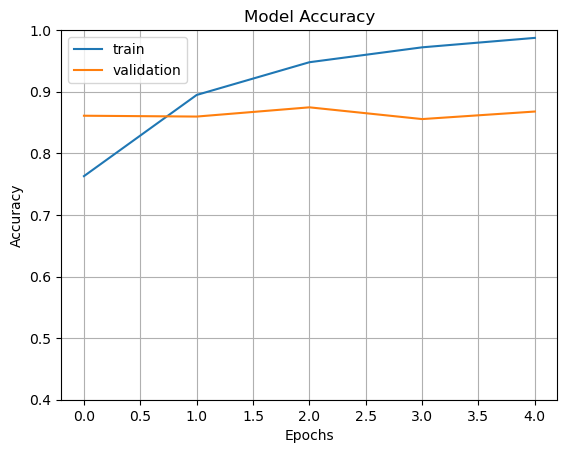

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)  # Corrected from 'ymix' to 'ymax'
plt.grid()  # Corrected from 'plt.grad()' to 'plt.grid()'
plt.title("Model Accuracy")
plt.ylabel("Accuracy")  # Corrected from 'ylable' to 'ylabel'
plt.xlabel("Epochs")
plt.legend(['train', 'validation'])
plt.show()

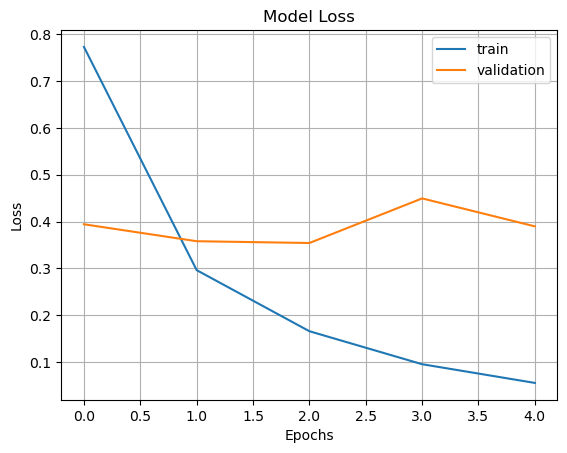

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['train', 'validation'])
plt.show()

### Making The prediction

In [15]:
import cv2

image = cv2.imread(str(roses[0]))
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)
print(image.shape)

(1, 180, 180, 3)


In [16]:
predict_img = resnet_model.predict(image)
print(predict_img)

1/1 [==============================] - 2s 2s/step
[[1.1357944e-02 5.2020841e-05 9.6952325e-01 1.1624402e-05 1.9055150e-02]]


In [23]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
image2 = cv2.imread(str(roses[100]))  # Load the image from the path in 'roses[100]'
image_resized = cv2.resize(image2, (img_height, img_width))  # Resize to model input size
image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)  # Convert to RGB
image_array = np.expand_dims(image_resized, axis=0)  # Add batch dimension
image_array = preprocess_input(image_array)

In [27]:
img_height, img_width = 224, 224
from tensorflow.keras.applications import ResNet50
from PIL import Image
# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet')

# Load and preprocess the image
image2 = cv2.imread(str(roses[100]))
if image2 is None:
    raise ValueError("Image not found or unable to load.")

# Convert BGR to RGB
image_resized = cv2.resize(image2, (img_height, img_width))
image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
image_array = np.expand_dims(image_resized, axis=0)
image_array = preprocess_input(image_array)

# Predict the image
predict_img2 = resnet_model.predict(image_array)

# Ensure the shape is (1, 1000)
if predict_img2.shape[1] != 1000:
    raise ValueError(f"Unexpected prediction shape: {predict_img2.shape}")

# Decode the prediction
decoded_predictions = decode_predictions(predict_img2, top=3)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")

# Convert NumPy image to PIL image for display
image_pil = Image.fromarray(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
image_pil.show()

1/1 [==============================] - 2s 2s/step
1: coral_fungus (0.70)
2: vase (0.10)
3: picket_fence (0.03)


In [28]:
output_class = class_names[np.argmax(predict_img)]
print("The predicted class is", output_class)

The predicted class is roses


In [30]:
import cv2
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image

# Define image dimensions
img_height, img_width = 224, 224

# Load the pre-trained ResNet50 model
resnet_model = ResNet50(weights='imagenet')

# Load and preprocess the image
image2 = cv2.imread(str(roses[100]))
if image2 is None:
    raise ValueError("Image not found or unable to load.")

# Convert BGR to RGB
image_resized = cv2.resize(image2, (img_height, img_width))
image_resized = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
image_array = np.expand_dims(image_resized, axis=0)
image_array = preprocess_input(image_array)

# Predict the image
predict_img2 = resnet_model.predict(image_array)

# Ensure the shape is (1, 1000)
if predict_img2.shape[1] != 1000:
    raise ValueError(f"Unexpected prediction shape: {predict_img2.shape}")

# Decode the prediction
decoded_predictions = decode_predictions(predict_img2, top=3)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
    print(f"{i + 1}: {label} ({score:.2f})")

# Convert NumPy image to PIL image for display
image_pil = Image.fromarray(image_resized)  # Use the RGB image array
image_pil.show()

1/1 [==============================] - 3s 3s/step
1: coral_fungus (0.70)
2: vase (0.10)
3: picket_fence (0.03)
